<a href="https://colab.research.google.com/github/ViceBitz/CalligraphyClassifier/blob/main/CalligraphyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
from google.colab import drive

In [ ]:
# prompt: read images from my google drive

drive.mount('/content/drive')

# Get the path to the directory containing the images
image_dir = '/content/drive/My Drive/Calligraphy Dataset'

# Read the images from the directory
images = []
labels = []
for artistName in os.listdir(image_dir):
    folder_dir = os.path.join(image_dir, artistName)
    if "ignore" in artistName.lower(): continue

    all_subimages = []
    for imgName in os.listdir(folder_dir):
      image = cv2.imread(os.path.join(folder_dir, imgName))
      all_subimages.append(image)

    images.append(all_subimages)
    labels.append(artistName.rsplit(".",1)[0])

numArtists = len(images)
print(numArtists, len(images[0]))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2 36


In [ ]:

#Resize the images
for cur in range(numArtists):
  scaled_images = []
  for image in images[cur]:
    image = cv2.resize(image, (50, 50))
    scaled_images.append(np.array(image))
  images[cur] = scaled_images


In [ ]:
# Greyscale images
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for cur in range(numArtists):
  images[cur] = [rgb2gray(image) for image in images[cur]]



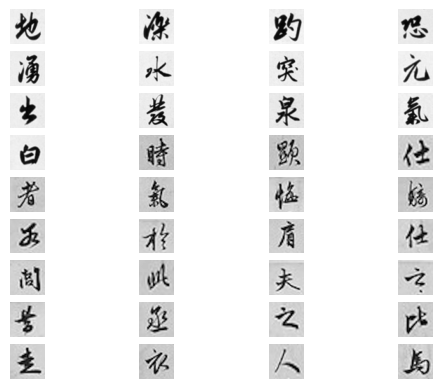

In [ ]:
# Display the subimages
show_index = 0
for i in range(len(images[show_index])):
    plt.subplot(math.ceil(len(images[show_index])/4), 4, i + 1)
    plt.imshow(images[show_index][i], cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
# Flatten subimages and make train/test tables
img_train = []
labels_train = []
img_test = []
labels_test = []

for cur in range(numArtists):
  for i in range(len(images[cur])):
    if (i < len(images[cur])//2):
      img_train.append(images[cur][i])

      image_label = [0] * numArtists
      image_label[cur] = 1
      labels_train.append(image_label)
    else:
      img_test.append(images[cur][i])

      image_label = [0] * numArtists
      image_label[cur] = 1
      labels_test.append(image_label)




In [ ]:

img_train = np.array([img for img in img_train])
labels_train = np.array([label for label in labels_train])
img_test = np.array([img for img in img_train])
labels_test = np.array([label for label in labels_train])

img_train = img_train.reshape(len(img_train),50,50,1)
img_test = img_train.reshape(len(img_test),50,50,1)

In [ ]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(50, 50, 1), activation='relu',))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# 128 neurons
model.add(Dense(256, activation='relu'))

# classifier
model.add(Dense(numArtists, activation='softmax'))
# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(img_train,labels_train,epochs=40,validation_data=(img_test,labels_test))

Epoch 1/40
2/2 [==============================] - 6s 5s/step - loss: 14.5058 - accuracy: 0.5294 - val_loss: 2268.9421 - val_accuracy: 0.5294
Epoch 2/40
2/2 [==============================] - 0s 121ms/step - loss: 2233.2024 - accuracy: 0.5294 - val_loss: 867.4829 - val_accuracy: 0.5294
Epoch 3/40
2/2 [==============================] - 0s 127ms/step - loss: 867.4830 - accuracy: 0.5294 - val_loss: 414.8107 - val_accuracy: 0.4706
Epoch 4/40
2/2 [==============================] - 0s 129ms/step - loss: 414.8107 - accuracy: 0.4706 - val_loss: 518.6696 - val_accuracy: 0.4706
Epoch 5/40
2/2 [==============================] - 2s 1s/step - loss: 518.6696 - accuracy: 0.4706 - val_loss: 426.7099 - val_accuracy: 0.4706
Epoch 6/40
2/2 [==============================] - 1s 474ms/step - loss: 422.5070 - accuracy: 0.4706 - val_loss: 258.7825 - val_accuracy: 0.4706
Epoch 7/40
2/2 [==============================] - 0s 191ms/step - loss: 247.6222 - accuracy: 0.4706 - val_loss: 44.3295 - val_accuracy: 0.470

<Axes: >

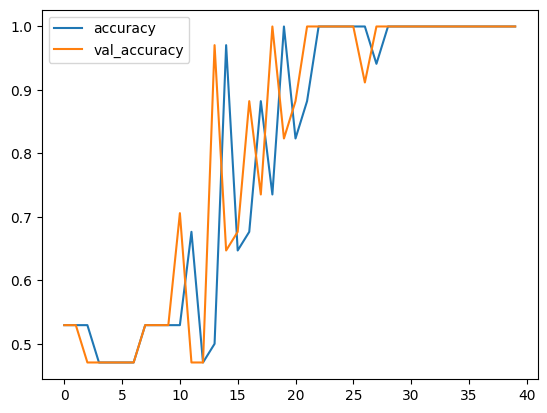

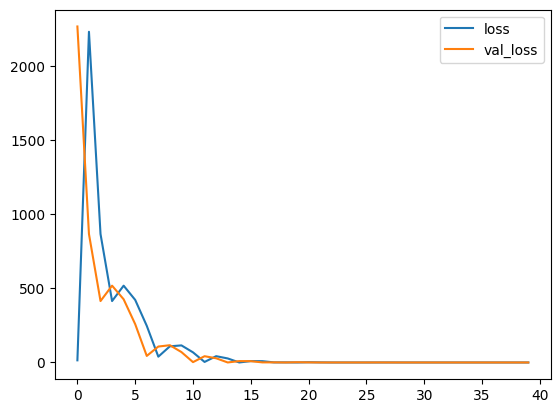

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(img_test,labels_test,verbose=0))

predictions = np.argmax(model.predict(img_test), axis=1)
print(predictions)

['loss', 'accuracy']
[0.0, 1.0]
2/2 [==============================] - 2s 2s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
